# Applications of MLP

### Importing the libraries

In [184]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [10]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [14]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [13]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [231]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data

In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 4] = le.fit_transform(X[:, 4])

In [233]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0]), ('scaler', StandardScaler(), [1, 2, 3, 5, 6, 7])], remainder='passthrough')
X = ct.fit_transform(X)

In [234]:
print(X)

[[1.0 0.0 0.0 ... 1.0017057235688864 0.04770421587098508 4]
 [1.0 0.0 0.0 ... 1.0017057235688864 -1.426209989644696 0]
 [0.0 1.0 0.0 ... 0.16110802156803655 0.4898784775256894 4]
 ...
 [0.0 1.0 0.0 ... 0.16110802156803655 0.4161827672499054 3]
 [1.0 0.0 0.0 ... -1.4266876377669033 -0.9349052544728024 4]
 [1.0 0.0 0.0 ... 1.0017057235688864 -1.1805576220587493 1]]


### Splitting the dataset into the Training set and Test set

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [248]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Part 2 - Building the ANN

### Initializing the ANN

In [236]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [237]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer


In [238]:
ann.add(tf.keras.layers.Dense(units=4, activation='linear'))

### Adding the output layer

In [239]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [240]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [246]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 3s 845us/step - loss: 0.1457 - accuracy: 0.9507
Epoch 2/100
2500/2500 [==============================] - 2s 837us/step - loss: 0.1151 - accuracy: 0.9596
Epoch 3/100
2500/2500 [==============================] - 2s 835us/step - loss: 0.1142 - accuracy: 0.9597
Epoch 4/100
2500/2500 [==============================] - 2s 941us/step - loss: 0.1139 - accuracy: 0.9601
Epoch 5/100
2500/2500 [==============================] - 2s 873us/step - loss: 0.1137 - accuracy: 0.9603
Epoch 6/100
2500/2500 [==============================] - 2s 875us/step - loss: 0.1137 - accuracy: 0.9602
Epoch 7/100
2500/2500 [==============================] - 2s 893us/step - loss: 0.1134 - accuracy: 0.9602
Epoch 8/100
2500/2500 [==============================] - 2s 854us/step - loss: 0.1132 - accuracy: 0.9601
Epoch 9/100
2500/2500 [==============================] - 2s 929us/step - loss: 0.1133 - accuracy: 0.9602
Epoch 10/100
2500/2500 [==============================]

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [249]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 1s 693us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [250]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy_score(y_test, y_pred)

[[18172   125]
 [  641  1062]]


0.9617

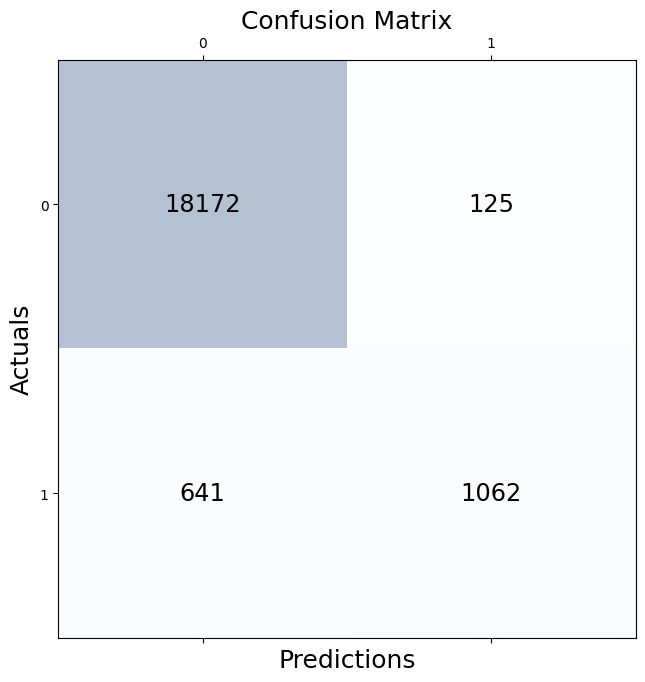

In [251]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()